In [1]:
import numpy as np

In [2]:

data1 = np.random.randn(N//3,2) + np.array([5,6])
data2 = np.random.randn(N//3,2) + np.array([-5,-6])
data3 = np.random.randn(N//3,2) + np.array([-10,3])
data = np.concatenate((data1, data2, data3))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

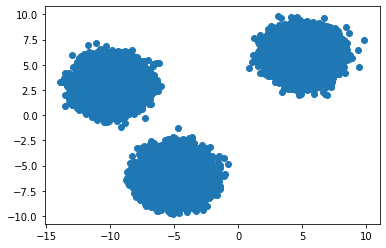

In [4]:
plt.scatter(data[:,0], data[:,1])

In [9]:
N = 100000

In [13]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class KMeans(BaseEstimator, ClassifierMixin):
    def __init__(
         self, 
         K: int=2, 
         max_iter: int=10, 
         random_state: int = 42,
         tol: float = 1e-6
        ):
        self.K = K
        self.max_iter = max_iter
        self.centroids = None
        self.random_state = random_state
        self.tol = tol
        np.random.seed(random_state)
        
    def _init_centroids(self, X: np.array) -> None:
        N = X.shape[0]
        self.centroids = X[np.random.choice(N,self.K,replace=False)]

    def _update_labels(self, X: np.array, labels: np.array) -> None:
        for i, point in enumerate(X):
            dists = np.linalg.norm(point - self.centroids, axis=1) # sum along the rows
            labels[i] = np.argmin(dists)
            
    def _update_centroids(self, X: np.array, labels: np.array) -> None:
        self.centroids = np.stack([
                            X[labels==i].mean(axis=0) for i in range(self.K)
        ])
    
    def fit(self, X: np.array, y: np.array=None) -> None:
        self._init_centroids(X)
        labels = np.empty(X.shape[0])
        
        for _ in range(self.max_iter):
            
            # label points belonging to clusters
            prev_centroids = self.centroids

            # update labels
            self._update_labels(X, labels)
            
            # update centroids
            self._update_centroids(X, labels)
            if np.linalg.norm(prev_centroids - self.centroids) < self.tol:
                break
            
        return self
    
    def predict(self, X: np.array) -> np.array:
        labels = np.empty(X.shape[0])
        for i, point in enumerate(X):
            dist = np.linalg.norm(X - self.centroids, axis=1)
            label[i] =  np.argmin(dist)
        return label
    
    def score(self, X: np.array, y: np.array=None) -> np.array:
        

In [11]:
kmeans = KMeans(3)

In [12]:
from time import time
t1 = time()
kmeans = kmeans.fit(data)
t2 = time()
print(t2-t1)

16.63902997970581


In [135]:
kmeans.centroids

array([[-9.98819682,  2.97906817],
       [ 5.01371937,  6.02544317],
       [-5.0045175 , -6.01461851]])

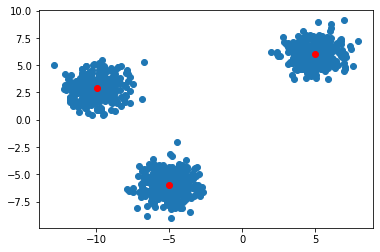

In [128]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
for c in kmeans.centroids:
    plt.scatter(*c, color="red")

In [94]:
kmeans.score(data)

1.2515465219847048

In [95]:
from sklearn.model_selection import GridSearchCV

In [115]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [119]:
X.shape

(150, 4)

In [96]:
params = {"K": [1,2,3,4,5,6]}

In [97]:
grid = GridSearchCV(estimator=KMeans(),
                    param_grid=params)

In [98]:
results = grid.fit(data)

In [117]:
scores = [ KMeans(k).fit(X).score(X) for k in range(1,7)]

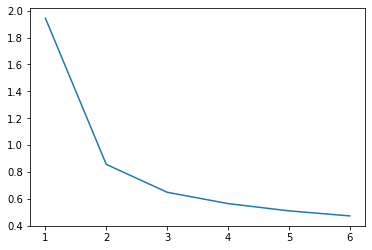

In [118]:
plt.plot(range(1,7), scores)